<a href="https://www.kaggle.com/code/ayeshairshadcoder/loan-status-prediction?scriptVersionId=116654455" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Importing Data

In [3]:
loan=pd.read_csv("/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv")
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploring data

In [4]:
type(loan)

pandas.core.frame.DataFrame

In [5]:
#rows and column
loan.shape

(614, 13)

In [6]:
#statictical measures
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
#checking null values
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Data Encoding

In [10]:
#label encoding 
loan["Loan_Status"].replace('N',0,inplace=True)
loan["Loan_Status"].replace('Y',1,inplace=True)

In [11]:
loan["Loan_Status"].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [12]:
loan.replace({ 'Married':{'No':0,'Yes':1} , 
               'Gender':{'Male':1,'Female':0},
               'Self_Employed':{'Yes':1,'No':0},
               'Property_Area':{'Rural':0,"Urban":1,"Semiurban":2},
               "Education":{'Graduate':1,'Not Graduate':0}},inplace=True)

In [13]:
loan.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents            object
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [14]:
loan.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.369612,-0.049258,-0.009829,0.053989,0.083946,0.106947,-0.075117,0.016337,-0.111964,0.019857
Married,0.369612,1.000000,-0.014223,0.001909,0.051332,0.077770,0.149519,-0.103810,0.004381,0.004754,0.089280
Education,-0.049258,-0.014223,1.000000,0.012333,0.140760,0.062290,0.171133,0.078784,0.081822,0.066740,0.085884
Self_Employed,-0.009829,0.001909,0.012333,1.000000,0.140826,-0.011152,0.123931,-0.037069,0.003883,-0.009740,-0.002303
ApplicantIncome,0.053989,0.051332,0.140760,0.140826,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.017321,-0.004710
CoapplicantIncome,0.083946,0.077770,0.062290,-0.011152,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.019087,-0.059187
LoanAmount,0.106947,0.149519,0.171133,0.123931,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.029437,-0.037318
Loan_Amount_Term,-0.075117,-0.103810,0.078784,-0.037069,-0.045306,-0.059878,0.039447,1.000000,0.001470,0.017506,-0.021268
Credit_History,0.016337,0.004381,0.081822,0.003883,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.036906,0.561678
Property_Area,-0.111964,0.004754,0.066740,-0.009740,-0.017321,-0.019087,-0.029437,0.017506,0.036906,1.000000,0.137545


In [15]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Cleaning Data

In [16]:
loan["Gender"].fillna(value=loan['Gender'].mode()[0],inplace=True)
loan["Married"].fillna(value=loan['Married'].mode()[0],inplace=True)
loan["Dependents"].fillna(value=loan['Dependents'].mode()[0],inplace=True)
loan["Self_Employed"].fillna(value=loan['Self_Employed'].mode()[0],inplace=True)
loan["LoanAmount"].fillna(value=loan['LoanAmount'].mode()[0],inplace=True)
loan["Loan_Amount_Term"].fillna(value=loan['Loan_Amount_Term'].mode()[0],inplace=True)
loan["Credit_History"].fillna(value=loan['Credit_History'].mode()[0],inplace=True)

In [17]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,120.0,360.0,1.0,1,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1


# **Exploratory Analysis and Visualization**

<AxesSubplot:>

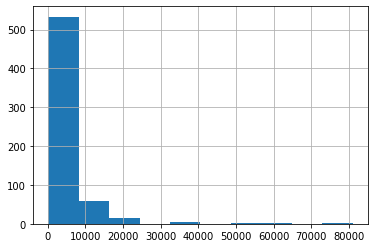

In [19]:
loan['ApplicantIncome'].hist()

<AxesSubplot:>

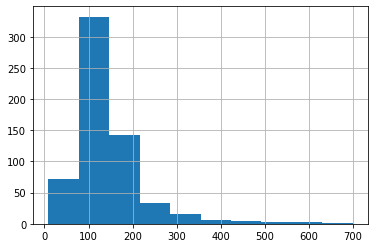

In [20]:
loan["LoanAmount"].hist()

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

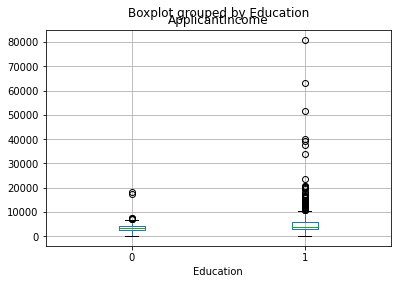

In [21]:
loan.boxplot(column='ApplicantIncome',by='Education')

<AxesSubplot:>

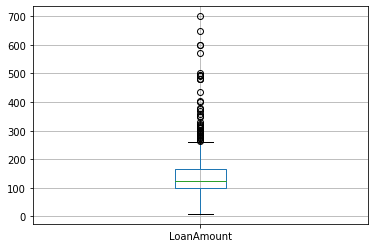

In [22]:
loan.boxplot(column='LoanAmount')

<AxesSubplot:>

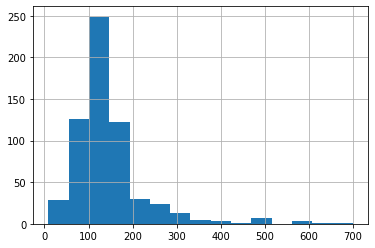

In [23]:
loan["LoanAmount"].hist(bins=15)

<AxesSubplot:xlabel='Education', ylabel='count'>

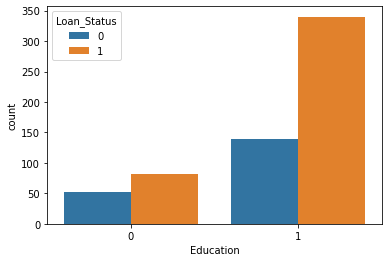

In [24]:
sns.countplot(x="Education",hue="Loan_Status",data=loan)

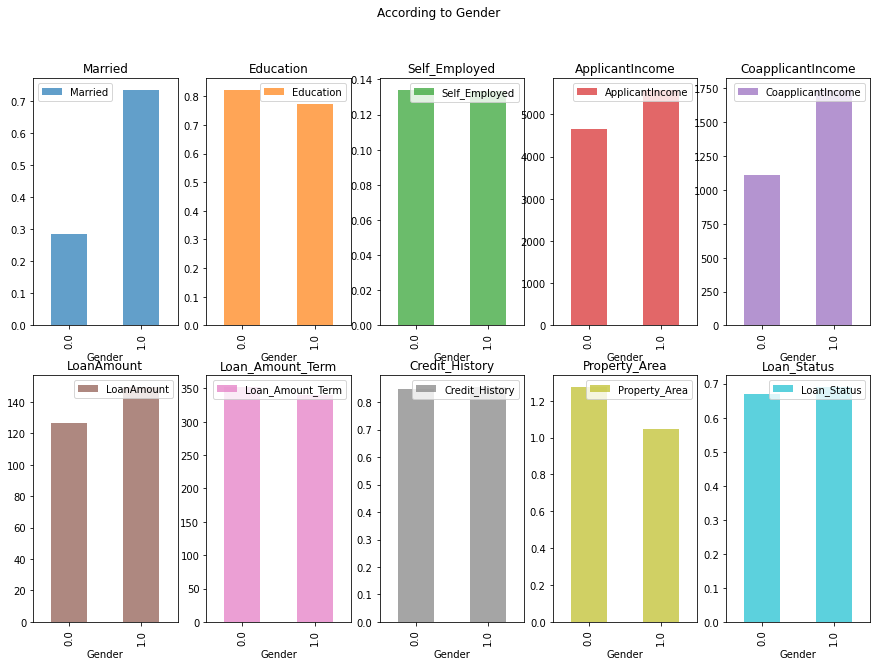

In [25]:
data=loan.groupby("Gender").mean().plot(kind="bar",subplots=True,sharex=False,sharey=False,figsize=(15,10),layout=(2,5),alpha=0.7,title="According to Gender")
data=sns.set_style("darkgrid")
data=sns.set_context('paper')
plt.show()

In [26]:
loan["Dependents"].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [27]:
loan=loan.replace(to_replace="3+",value=4)

In [28]:
loan["Dependents"].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

# Splitting Data and Training Model

In [29]:
X=loan.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=loan["Loan_Status"]

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [31]:
print(X.shape,X_train.shape,X_test.shape)

(614, 11) (552, 11) (62, 11)


In [32]:
model=svm.SVC(kernel='linear')

In [33]:
model.fit(X_train,Y_train)

SVC(kernel='linear')

# Model Evaluation

In [34]:
train_predict=model.predict(X_train)
train_accuracy=accuracy_score(train_predict,Y_train)

In [35]:
print("Accuracy on training data: ",train_accuracy)

Accuracy on training data:  0.8079710144927537


In [36]:
test_predict=model.predict(X_test)
test_accuracy=accuracy_score(test_predict,Y_test)

In [37]:
print(test_accuracy)

0.7903225806451613
